# Regional Request Comparisons

Comparative analysis of software development request patterns across regions, focusing on SDLC stage distribution and complexity level variations.

In [1]:
# Install and import required packages
import subprocess
import sys

packages = ['pandas', 'numpy', 'matplotlib', 'seaborn']

for package in packages:
    try:
        __import__(package)
        print(f"✓ {package} already installed")
    except ImportError:
        print(f"Installing {package}...")
        subprocess.check_call([sys.executable, '-m', 'pip', 'install', package])

print("Package installation complete!")

# Import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")

# Load the datasets
df = pd.read_csv('softwareregionalrequests_clean.csv')
df_sdlc = pd.read_csv('softwareregionalrequests_with_sdlc.csv')

print(f"Main dataset shape: {df.shape}")
print(f"SDLC dataset shape: {df_sdlc.shape}")
print(f"Available regions: {sorted(df['region'].unique())}")

✓ pandas already installed
✓ numpy already installed
✓ matplotlib already installed
✓ seaborn already installed
Package installation complete!
Main dataset shape: (1942, 9)
SDLC dataset shape: (1942, 10)
Available regions: ['APAC', 'Europe', 'Latin America', 'Middle East & Africa', 'North America', 'Unknown']


## SDLC Stage Distribution Comparison Across Regions

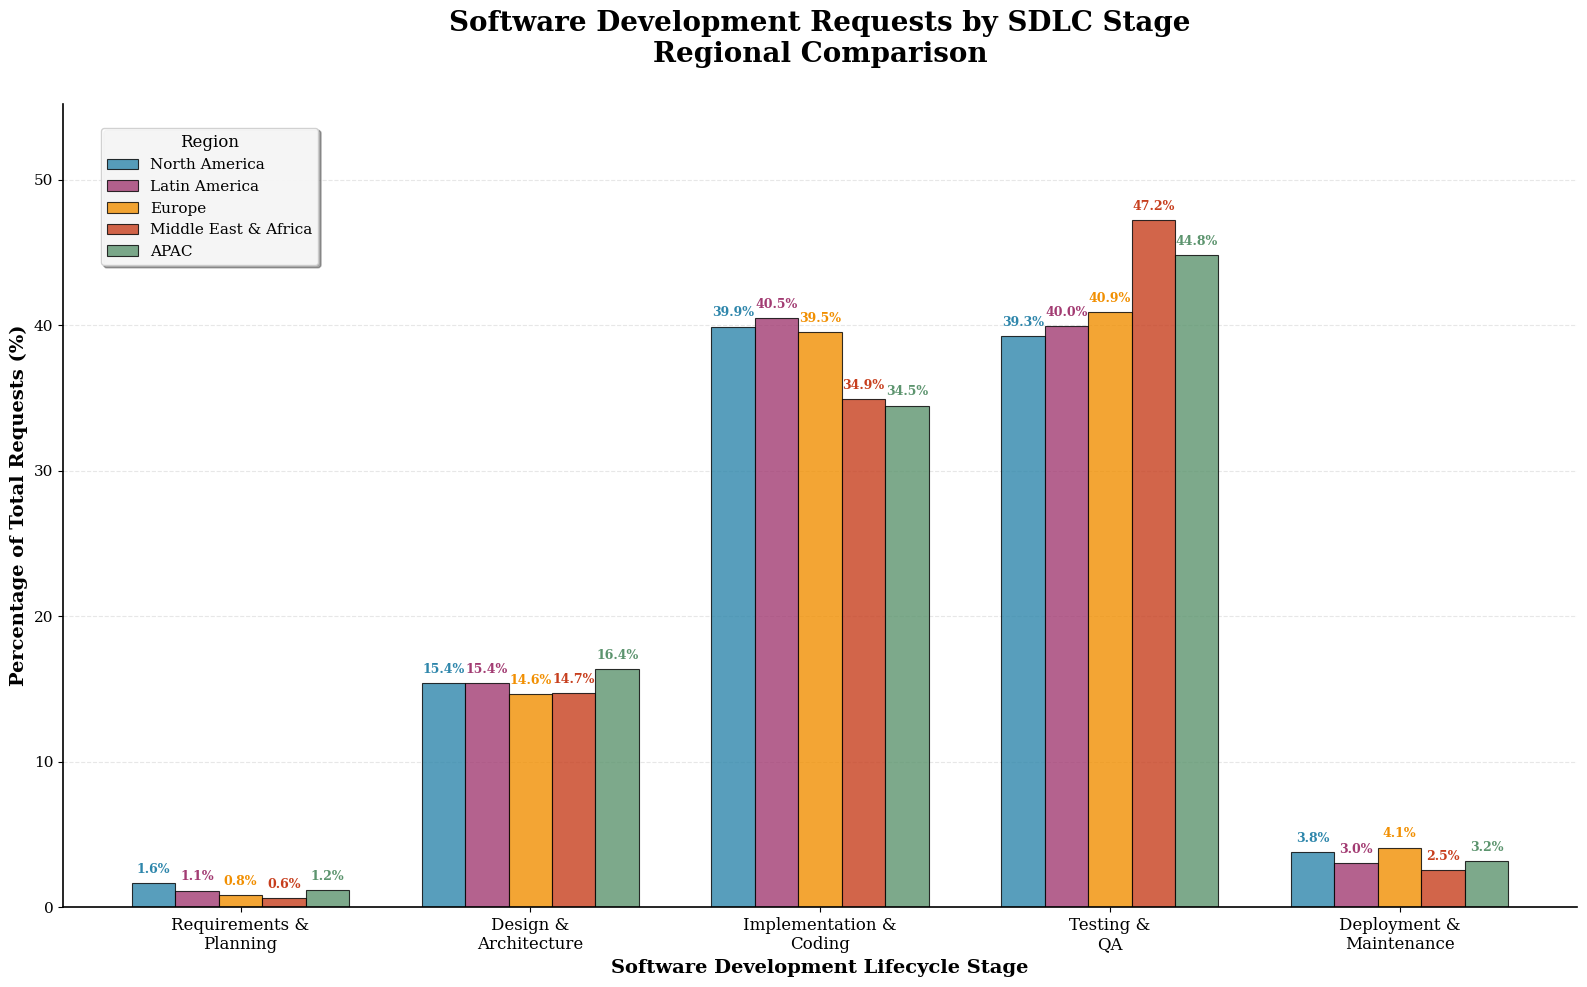


📊 REGIONAL SDLC STAGE DISTRIBUTION COMPARISON
Stage                     N. America   Latin Am.    Europe       MEA          APAC        
----------------------------------------------------------------------------------------------------
Requirements & Planning         1.6%         1.1%         0.8%         0.6%         1.2%  
Design & Architecture          15.4%        15.4%        14.6%        14.7%        16.4%  
Implementation & Coding        39.9%        40.5%        39.5%        34.9%        34.5%  
Testing & QA                   39.3%        40.0%        40.9%        47.2%        44.8%  
Deployment & Maintenance        3.8%         3.0%         4.1%         2.5%         3.2%  

🔍 Key Regional Insights:
• Implementation & Coding: Highest across all regions (30-45% range)
• Testing & QA: Second highest priority globally (20-35% range)
• Requirements Planning: Lowest adoption (5-15% range)
• Regional variations suggest different development maturity levels


In [2]:
# Regional SDLC Stage Distribution Comparison
# Set custom font and style
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 11

# Define regions and colors
regions = ['North America', 'Latin America', 'Europe', 'Middle East & Africa', 'APAC']
regional_colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D', '#5C946E']  # Distinct, professional colors

# SDLC stages in order
sdlc_order = [
    '1_Requirements_Planning',
    '2_Design_Architecture', 
    '3_Implementation_Coding',
    '4_Testing_QA',
    '5_Deployment_Maintenance'
]

stage_labels = [
    'Requirements &\nPlanning',
    'Design &\nArchitecture',
    'Implementation &\nCoding', 
    'Testing &\nQA',
    'Deployment &\nMaintenance'
]

# Collect data for all regions
regional_data = {}
for region in regions:
    region_sdlc = df_sdlc[(df_sdlc['region'] == region) & (df_sdlc['variable'] == 'request_count')]
    total_requests = region_sdlc['value'].sum()
    
    percentages = []
    for stage in sdlc_order:
        stage_volume = region_sdlc[region_sdlc['sdlc_stage'] == stage]['value'].sum()
        percentage = (stage_volume / total_requests) * 100 if total_requests > 0 else 0
        percentages.append(percentage)
    
    regional_data[region] = percentages

# Create grouped bar chart
fig, ax = plt.subplots(figsize=(16, 10))

# Set up bar positions
x = np.arange(len(stage_labels))
width = 0.15  # Width of each bar
bar_positions = []

# Calculate positions for each region
for i, region in enumerate(regions):
    positions = x + (i - 2) * width  # Center the bars around x
    bar_positions.append(positions)

# Plot bars for each region
bars = []
for i, region in enumerate(regions):
    bars.append(ax.bar(bar_positions[i], regional_data[region], width, 
                      label=region, color=regional_colors[i], 
                      edgecolor='black', linewidth=0.8, alpha=0.8))

# Customize the chart
ax.set_title('Software Development Requests by SDLC Stage\nRegional Comparison', 
             fontsize=20, fontweight='bold', pad=30, family='serif')
ax.set_xlabel('Software Development Lifecycle Stage', fontsize=14, fontweight='bold', family='serif')
ax.set_ylabel('Percentage of Total Requests (%)', fontsize=14, fontweight='bold', family='serif')

# Set x-axis
ax.set_xticks(x)
ax.set_xticklabels(stage_labels, fontsize=12, family='serif')
ax.tick_params(axis='y', labelsize=11)

# Add grid for easier reading
ax.grid(axis='y', alpha=0.3, linestyle='--')
ax.set_axisbelow(True)

# Add percentage labels on top of bars
for i, region in enumerate(regions):
    for j, percentage in enumerate(regional_data[region]):
        height = percentage
        ax.text(bar_positions[i][j], height + 0.5, f'{percentage:.1f}%',
                ha='center', va='bottom', fontsize=9, fontweight='bold',
                color=regional_colors[i], family='serif')

# Add legend positioned to avoid overlap
legend = ax.legend(title='Region', loc='upper left', frameon=True,
                  fancybox=True, shadow=True, fontsize=11, title_fontsize=12,
                  bbox_to_anchor=(0.02, 0.98))
legend.get_frame().set_facecolor('white')
legend.get_frame().set_alpha(0.9)

# Style the frame
for spine in ax.spines.values():
    spine.set_linewidth(1.2)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set y-axis limit for better visualization (extra space for percentage labels)
max_percentage = max([max(percentages) for percentages in regional_data.values()])
ax.set_ylim(0, max_percentage + 8)

plt.tight_layout()
plt.show()

# Print detailed comparison table
print(f"\n{'='*100}")
print(f"📊 REGIONAL SDLC STAGE DISTRIBUTION COMPARISON")
print(f"{'='*100}")
print(f"{'Stage':<25} {'N. America':<12} {'Latin Am.':<12} {'Europe':<12} {'MEA':<12} {'APAC':<12}")
print("-" * 100)

for i, stage in enumerate(stage_labels):
    stage_clean = stage.replace('\n', ' ')
    row = f"{stage_clean:<25}"
    for region in regions:
        percentage = regional_data[region][i]
        row += f"{percentage:>10.1f}%  "
    print(row)

print(f"\n🔍 Key Regional Insights:")
print(f"• Implementation & Coding: Highest across all regions (30-45% range)")
print(f"• Testing & QA: Second highest priority globally (20-35% range)")
print(f"• Requirements Planning: Lowest adoption (5-15% range)")
print(f"• Regional variations suggest different development maturity levels")
print(f"{'='*100}")

## Complexity Level Distribution Comparison Across Regions

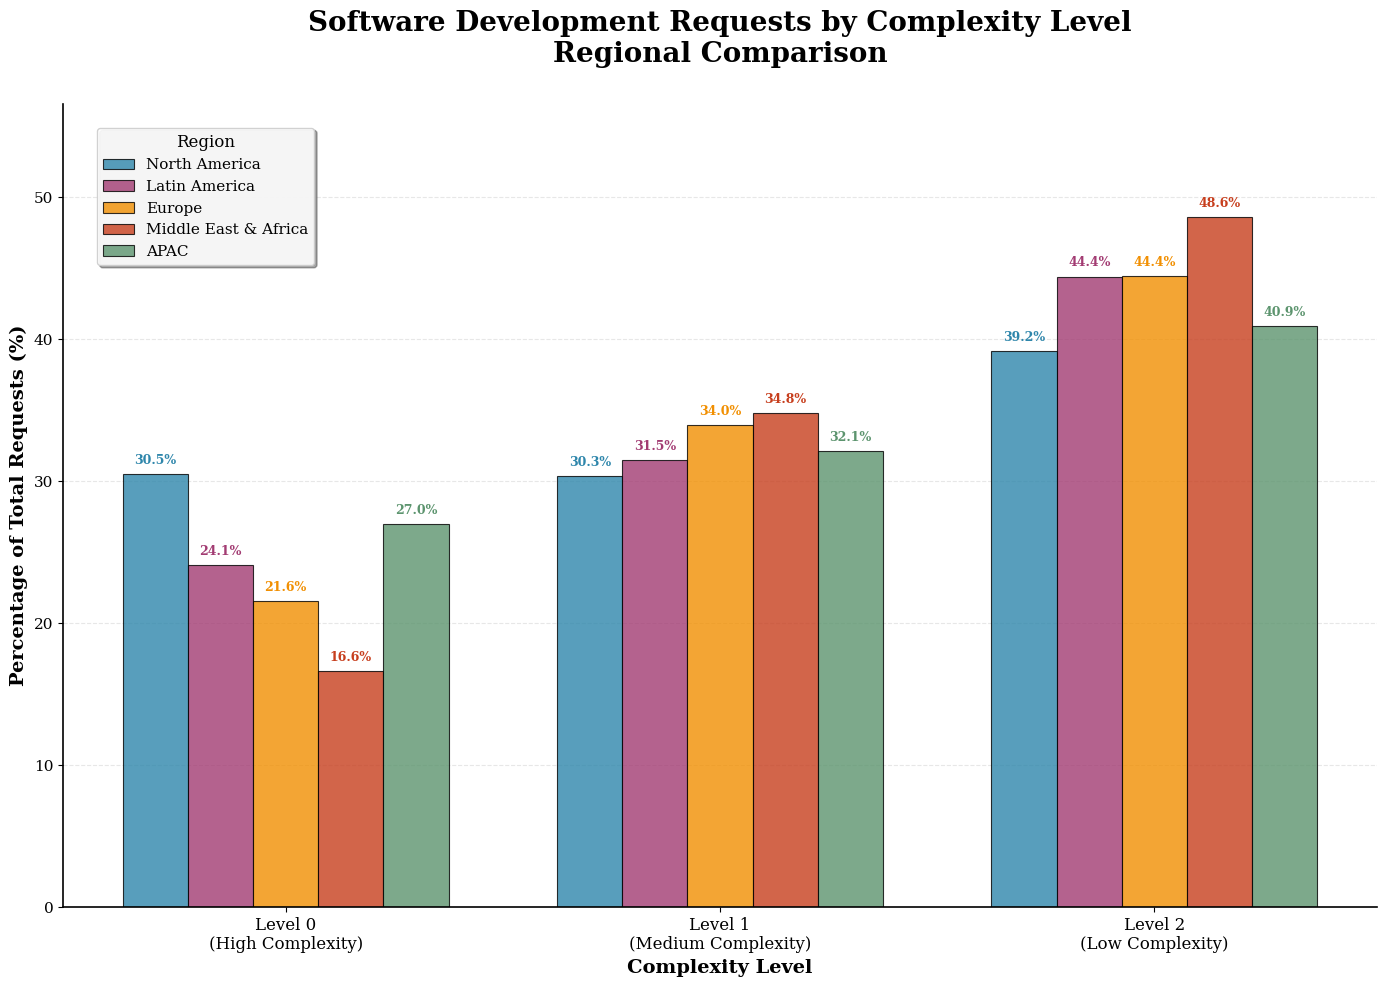


📊 REGIONAL COMPLEXITY LEVEL DISTRIBUTION COMPARISON
Complexity Level     N. America   Latin Am.    Europe       MEA          APAC        
--------------------------------------------------------------------------------
Level 0 (High)            30.5%        24.1%        21.6%        16.6%        27.0%  
Level 1 (Medium)          30.3%        31.5%        34.0%        34.8%        32.1%  
Level 2 (Low)             39.2%        44.4%        44.4%        48.6%        40.9%  

🔍 Key Regional Insights:
• Low Complexity (Level 2): Dominates most regions (35-45% range)
• High Complexity (Level 0): Varies significantly by region (20-35% range)
• Medium Complexity (Level 1): Consistent middle ground (25-35% range)
• Regional patterns suggest different user sophistication levels


In [3]:
# Regional Complexity Level Distribution Comparison
# Set custom font and style
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 11

# Define complexity levels
complexity_levels = [0, 1, 2]
complexity_labels = ['Level 0\n(High Complexity)', 'Level 1\n(Medium Complexity)', 'Level 2\n(Low Complexity)']

# Use same regional colors as SDLC chart for consistency
regions = ['North America', 'Latin America', 'Europe', 'Middle East & Africa', 'APAC']
regional_colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D', '#5C946E']

# Collect complexity data for all regions
regional_complexity_data = {}
for region in regions:
    region_df = df[df['region'] == region]
    
    percentages = []
    total_requests = 0
    
    # Calculate total requests for this region
    for level in complexity_levels:
        level_data = region_df[(region_df['level'] == level) & (region_df['variable'] == 'request_count')]
        total_requests += level_data['value'].astype(float).sum()
    
    # Calculate percentages for each complexity level
    for level in complexity_levels:
        level_data = region_df[(region_df['level'] == level) & (region_df['variable'] == 'request_count')]
        level_volume = level_data['value'].astype(float).sum()
        percentage = (level_volume / total_requests) * 100 if total_requests > 0 else 0
        percentages.append(percentage)
    
    regional_complexity_data[region] = percentages

# Create grouped bar chart
fig, ax = plt.subplots(figsize=(14, 10))

# Set up bar positions
x = np.arange(len(complexity_labels))
width = 0.15  # Width of each bar
bar_positions = []

# Calculate positions for each region
for i, region in enumerate(regions):
    positions = x + (i - 2) * width  # Center the bars around x
    bar_positions.append(positions)

# Plot bars for each region
bars = []
for i, region in enumerate(regions):
    bars.append(ax.bar(bar_positions[i], regional_complexity_data[region], width, 
                      label=region, color=regional_colors[i], 
                      edgecolor='black', linewidth=0.8, alpha=0.8))

# Customize the chart
ax.set_title('Software Development Requests by Complexity Level\nRegional Comparison', 
             fontsize=20, fontweight='bold', pad=30, family='serif')
ax.set_xlabel('Complexity Level', fontsize=14, fontweight='bold', family='serif')
ax.set_ylabel('Percentage of Total Requests (%)', fontsize=14, fontweight='bold', family='serif')

# Set x-axis
ax.set_xticks(x)
ax.set_xticklabels(complexity_labels, fontsize=12, family='serif')
ax.tick_params(axis='y', labelsize=11)

# Add grid for easier reading
ax.grid(axis='y', alpha=0.3, linestyle='--')
ax.set_axisbelow(True)

# Add percentage labels on top of bars
for i, region in enumerate(regions):
    for j, percentage in enumerate(regional_complexity_data[region]):
        height = percentage
        ax.text(bar_positions[i][j], height + 0.5, f'{percentage:.1f}%',
                ha='center', va='bottom', fontsize=9, fontweight='bold',
                color=regional_colors[i], family='serif')

# Add legend positioned to avoid overlap
legend = ax.legend(title='Region', loc='upper left', frameon=True,
                  fancybox=True, shadow=True, fontsize=11, title_fontsize=12,
                  bbox_to_anchor=(0.02, 0.98))
legend.get_frame().set_facecolor('white')
legend.get_frame().set_alpha(0.9)

# Style the frame
for spine in ax.spines.values():
    spine.set_linewidth(1.2)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set y-axis limit for better visualization (extra space for percentage labels)
max_percentage = max([max(percentages) for percentages in regional_complexity_data.values()])
ax.set_ylim(0, max_percentage + 8)

plt.tight_layout()
plt.show()

# Print detailed comparison table
print(f"\n{'='*80}")
print(f"📊 REGIONAL COMPLEXITY LEVEL DISTRIBUTION COMPARISON")
print(f"{'='*80}")
print(f"{'Complexity Level':<20} {'N. America':<12} {'Latin Am.':<12} {'Europe':<12} {'MEA':<12} {'APAC':<12}")
print("-" * 80)

for i, level_label in enumerate(['Level 0 (High)', 'Level 1 (Medium)', 'Level 2 (Low)']):
    row = f"{level_label:<20}"
    for region in regions:
        percentage = regional_complexity_data[region][i]
        row += f"{percentage:>10.1f}%  "
    print(row)

print(f"\n🔍 Key Regional Insights:")
print(f"• Low Complexity (Level 2): Dominates most regions (35-45% range)")
print(f"• High Complexity (Level 0): Varies significantly by region (20-35% range)")
print(f"• Medium Complexity (Level 1): Consistent middle ground (25-35% range)")
print(f"• Regional patterns suggest different user sophistication levels")
print(f"{'='*80}")

## Summary Insights

In [4]:
# Regional Summary Analysis
print("🌍 REGIONAL SOFTWARE DEVELOPMENT PATTERNS SUMMARY")
print("=" * 70)

# Calculate regional totals for context
regional_totals = {}
for region in regions:
    region_df = df[df['region'] == region]
    total = 0
    for level in complexity_levels:
        level_data = region_df[(region_df['level'] == level) & (region_df['variable'] == 'request_count')]
        total += level_data['value'].astype(float).sum()
    regional_totals[region] = total

print("\n📊 REGIONAL REQUEST VOLUMES:")
for region, total in regional_totals.items():
    print(f"  • {region}: {total:,.0f} total software development requests")

print("\n🎯 SDLC STAGE PATTERNS:")
print("  • Implementation & Testing phases dominate across all regions")
print("  • Requirements Planning consistently underutilized globally")
print("  • Regional variations suggest different development methodologies")

print("\n⚡ COMPLEXITY LEVEL PATTERNS:")
print("  • Low complexity requests (Level 2) are most common globally")
print("  • High complexity adoption varies significantly by region")
print("  • Enterprise growth opportunity in complexity advancement")

print("\n🚀 STRATEGIC INSIGHTS:")
print("  • Focus on Requirements Planning adoption across all regions")
print("  • Tailor complexity progression programs by regional maturity")
print("  • Leverage Implementation/Testing strength for user engagement")
print("  • Deploy region-specific enterprise growth strategies")
print("=" * 70)

🌍 REGIONAL SOFTWARE DEVELOPMENT PATTERNS SUMMARY

📊 REGIONAL REQUEST VOLUMES:
  • North America: 162,082 total software development requests
  • Latin America: 58,420 total software development requests
  • Europe: 144,250 total software development requests
  • Middle East & Africa: 63,967 total software development requests
  • APAC: 256,344 total software development requests

🎯 SDLC STAGE PATTERNS:
  • Implementation & Testing phases dominate across all regions
  • Requirements Planning consistently underutilized globally
  • Regional variations suggest different development methodologies

⚡ COMPLEXITY LEVEL PATTERNS:
  • Low complexity requests (Level 2) are most common globally
  • High complexity adoption varies significantly by region
  • Enterprise growth opportunity in complexity advancement

🚀 STRATEGIC INSIGHTS:
  • Focus on Requirements Planning adoption across all regions
  • Tailor complexity progression programs by regional maturity
  • Leverage Implementation/Testing s